In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# carrega dataset 2022
df_enem_2022 = pd.read_csv('../../data/enem_2022_v2.csv')

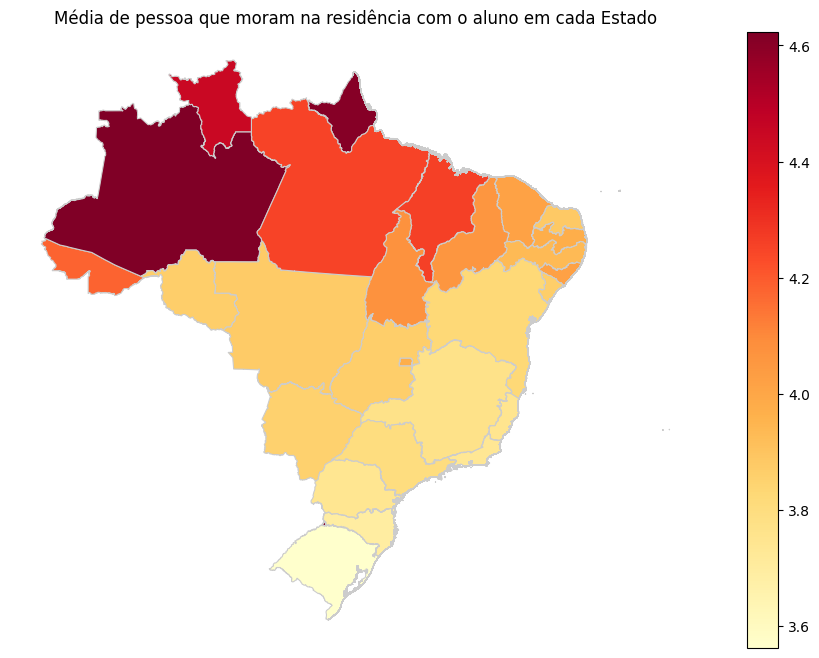

In [4]:
# Carregar o mapa geoespacial
map_data = gpd.read_file('../../data/brazil_geo.json')

# Calculando a média da quantidade de pessoas que moram na residência com o aluno por estado
df_enem_2022['media_qtd_moradores'] = df_enem_2022.groupby('SG_UF_ESC')['Q005'].transform('mean')

# Mesclar os dados do mapa com as médias da quantidade de moradores
merged_data = map_data.merge(df_enem_2022.groupby('SG_UF_ESC')['media_qtd_moradores'].mean().reset_index(), left_on='id', right_on='SG_UF_ESC', how='left')

# Criar o gráfico
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='media_qtd_moradores', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Configurações do gráfico
ax.set_title('Média de pessoa que moram na residência com o aluno em cada Estado')
ax.set_axis_off()

# Mostrar o gráfico
plt.show()